In [42]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('data/PCPS_12-10-2022 20-33-48-66_timeSeries.csv')

In [43]:
df.head()

,Country Name,Country Code,Commodity Name,Commodity Code,Unit Name,Unit Code,Attribute,1990,1990Q1,1990M1,...,2022Q2,2022M4,2022M5,2022M6,2022Q3,2022M7,2022M8,2022M9,2022M10,Unnamed: 564
0,World,1,Agriculture,PAGRI,Percent Change over Previous Period,PC_PP_PT,Value,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,1,Agriculture,PAGRI,Percent Change over Previous Period,PC_PP_PT,Value,NaN,NaN,NaN,...,5.840109,NaN,NaN,NaN,-11.863510,NaN,NaN,NaN,NaN,NaN
2,World,1,Agriculture,PAGRI,Percent Change over Previous Period,PC_PP_PT,Value,NaN,NaN,NaN,...,NaN,2.241658,-1.524145,-3.2986,NaN,-7.384641,-1.791371,-2.962858,-0.435042,NaN
3,World,1,All index,PALLFNF,Percent Change over Previous Period,PC_PP_PT,Value,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,World,1,All index,PALLFNF,Percent Change over Previous Period,PC_PP_PT,Value,NaN,NaN,NaN,...,7.805954,NaN,NaN,NaN,0.978474,NaN,NaN,NaN,NaN,NaN


In [44]:
oil_df = df.drop(columns=[col for col in df.columns if 'M' not in col and ('1' in col or '2' in col)]).\
    drop(columns='Unnamed: 564').dropna().reset_index(drop=True)

drop_out_list = ['Country Name', 'Country Code', 'Commodity Code', 'Unit Name', 'Unit Code', 'Attribute']

oil_df = oil_df[oil_df['Unit Code'] == 'USD'].drop(columns=drop_out_list).reset_index(drop=True)
oil_df.head()

,Commodity Name,1990M1,1990M2,1990M3,1990M4,1990M5,1990M6,1990M7,1990M8,1990M9,...,2022M1,2022M2,2022M3,2022M4,2022M5,2022M6,2022M7,2022M8,2022M9,2022M10
0,APSP crude oil($/bbl),20.365072,19.528833,18.220758,16.567778,16.587536,15.175556,17.136818,26.395652,32.856333,...,84.116984,92.466667,109.475652,103.632063,109.895909,114.742727,102.496508,95.676232,88.250303,90.740000
1,Diammonium phosphate,148.000000,145.800000,160.909091,175.619048,168.739130,174.333333,178.090909,177.260870,182.000000,...,776.449619,824.258800,1049.023565,1051.400000,929.305545,844.297182,851.799048,822.783478,824.608636,804.690000
2,Palm Oil,230.555951,223.945027,236.340509,220.639566,232.208681,224.771393,230.555951,240.472336,234.687778,...,1293.595216,1458.069777,1652.716393,1613.074355,1601.222104,1322.184621,902.891148,926.324433,794.488879,796.676318
3,Swine,93.147106,80.003995,79.910116,99.643558,115.678154,121.461123,96.188797,93.973244,95.681849,...,75.631905,90.390000,99.447826,99.297143,100.148571,107.058182,113.433500,115.851304,95.949524,91.568095
4,Fish,5.204495,5.646819,5.610611,5.631545,5.798833,5.672882,5.735000,5.921604,6.290644,...,8.017591,8.832649,9.418716,10.382207,10.537032,9.923866,8.842367,7.428819,6.173658,6.620871


In [45]:
print(oil_df.shape)
print(len(oil_df['Commodity Name'].unique()))

(67, 395)
67


In [46]:
from datetime import datetime


def str_to_date(string):

    date_object = datetime.strptime('{}-{}'.format(string.split('M')[0], string.split('M')[1]), "%Y-%m").date()
    return date_object

date_object = str_to_date('2022M1')
print(type(date_object))
print(date_object)

<class 'datetime.date'>
2022-01-01


In [47]:
new_df = pd.DataFrame()

for row in range(oil_df.shape[0]):

    ser = pd.DataFrame(oil_df.loc[row]).iloc[1:][row]
    ser1 = pd.DataFrame(ser).rename(columns={row: oil_df['Commodity Name'][row] })

    ser1.index = ser1.index.map(str_to_date)

    new_df[oil_df['Commodity Name'][row]] = ser1

new_df.head()

,APSP crude oil($/bbl),Diammonium phosphate,Palm Oil,Swine,Fish,"Tea, Kolkata","Vegetables, Tomato",Brent Crude,Fish Meal,"Natural gas, EU",...,Silver,Aluminum,Bananas,Barley,Soft Logs,"Hard Logs, Import Price Japan",Cobalt,Cotton,"Coal, Australia","Tea, Kenyan"
1990-01-01,20.365072,148.0,230.555951,93.147106,5.204495,264.25,0.0,20.98913,652.05913,1.73,...,5.247545,1528.0,589.7,75.568672,121.556919,156.039993,7630.000114,75.200012,38.0,252.929993
1990-02-01,19.528833,145.8,223.945027,80.003995,5.646819,276.73,0.0,19.7025,670.16885,1.73,...,5.28935,1454.0,644.9,73.864701,121.30828,153.100006,7659.999847,75.959991,38.0,211.289993
1990-03-01,18.220758,160.909091,236.340509,79.910116,5.610611,260.69,0.0,18.465909,641.984523,1.73,...,5.076886,1567.0,538.5,70.044579,128.017488,145.550003,8029.998779,78.899994,38.0,192.600006
1990-04-01,16.567778,175.619048,220.639566,99.643558,5.631545,286.57,0.0,16.92619,647.403119,2.11,...,5.059,1526.0,584.2,68.769082,127.257046,145.139999,8229.999542,82.869995,38.0,194.809998
1990-05-01,16.587536,168.73913,232.208681,115.678154,5.798833,330.37,0.0,16.671739,663.067609,2.11,...,5.073048,1527.0,494.4,71.026076,130.367009,155.669998,8150.001526,85.600006,40.5,187.020004


In [49]:
#new_df['Date'] = new_df.index

In [50]:
type(new_df['Date'][0])

datetime.date

In [51]:
new_df

,APSP crude oil($/bbl),Diammonium phosphate,Palm Oil,Swine,Fish,"Tea, Kolkata","Vegetables, Tomato",Brent Crude,Fish Meal,"Natural gas, EU",...,Aluminum,Bananas,Barley,Soft Logs,"Hard Logs, Import Price Japan",Cobalt,Cotton,"Coal, Australia","Tea, Kenyan",Date
1990-01-01,20.365072,148.0,230.555951,93.147106,5.204495,264.25,0.0,20.98913,652.05913,1.73,...,1528.0,589.7,75.568672,121.556919,156.039993,7630.000114,75.200012,38.0,252.929993,1990-01-01
1990-02-01,19.528833,145.8,223.945027,80.003995,5.646819,276.73,0.0,19.7025,670.16885,1.73,...,1454.0,644.9,73.864701,121.30828,153.100006,7659.999847,75.959991,38.0,211.289993,1990-02-01
1990-03-01,18.220758,160.909091,236.340509,79.910116,5.610611,260.69,0.0,18.465909,641.984523,1.73,...,1567.0,538.5,70.044579,128.017488,145.550003,8029.998779,78.899994,38.0,192.600006,1990-03-01
1990-04-01,16.567778,175.619048,220.639566,99.643558,5.631545,286.57,0.0,16.92619,647.403119,2.11,...,1526.0,584.2,68.769082,127.257046,145.139999,8229.999542,82.869995,38.0,194.809998,1990-04-01
1990-05-01,16.587536,168.73913,232.208681,115.678154,5.798833,330.37,0.0,16.671739,663.067609,2.11,...,1527.0,494.4,71.026076,130.367009,155.669998,8150.001526,85.600006,40.5,187.020004,1990-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,114.742727,844.297182,1322.184621,107.058182,9.923866,348.576722,3.44997,117.692727,1430.851894,32.912607,...,2575.669545,1440.23104,259.134607,286.89,222.298268,72057.727273,154.445455,427.425,265.288828,2022-06-01
2022-07-01,102.496508,851.799048,902.891148,113.4335,8.842367,362.315464,3.120125,105.252857,1398.522222,51.145913,...,2408.423333,1515.390687,240.298062,278.29,217.761568,55713.238095,131.035714,433.626531,264.48709,2022-07-01
2022-08-01,95.676232,822.783478,926.324433,115.851304,7.428819,360.579183,2.735098,97.643043,1399.36087,69.977239,...,2433.916087,1672.471775,212.400765,277.38,220.193669,49308.826087,124.758696,447.447565,262.222249,2022-08-01
2022-09-01,88.250303,824.608636,794.488879,95.949524,6.173658,309.66466,3.174074,90.608182,1314.445606,55.179127,...,2224.755909,1626.067303,180.587515,277.38,208.212226,51515.409091,117.940909,467.783673,268.763686,2022-09-01


In [57]:
new_df.to_csv('commodities_with_date.csv', index=False)

In [58]:
import pandas as pd
new_new_ = pd.read_csv('commodities_with_date.csv')

In [59]:
new_new_

,APSP crude oil($/bbl),Diammonium phosphate,Palm Oil,Swine,Fish,"Tea, Kolkata","Vegetables, Tomato",Brent Crude,Fish Meal,"Natural gas, EU",...,Aluminum,Bananas,Barley,Soft Logs,"Hard Logs, Import Price Japan",Cobalt,Cotton,"Coal, Australia","Tea, Kenyan",Date
0,20.365072,148.000000,230.555951,93.147106,5.204495,264.250000,0.000000,20.989130,652.059130,1.730000,...,1528.000000,589.700000,75.568672,121.556919,156.039993,7630.000114,75.200012,38.000000,252.929993,1990-01-01
1,19.528833,145.800000,223.945027,80.003995,5.646819,276.730000,0.000000,19.702500,670.168850,1.730000,...,1454.000000,644.900000,73.864701,121.308280,153.100006,7659.999847,75.959991,38.000000,211.289993,1990-02-01
2,18.220758,160.909091,236.340509,79.910116,5.610611,260.690000,0.000000,18.465909,641.984523,1.730000,...,1567.000000,538.500000,70.044579,128.017488,145.550003,8029.998779,78.899994,38.000000,192.600006,1990-03-01
3,16.567778,175.619048,220.639566,99.643558,5.631545,286.570000,0.000000,16.926190,647.403119,2.110000,...,1526.000000,584.200000,68.769082,127.257046,145.139999,8229.999542,82.869995,38.000000,194.809998,1990-04-01
4,16.587536,168.739130,232.208681,115.678154,5.798833,330.370000,0.000000,16.671739,663.067609,2.110000,...,1527.000000,494.400000,71.026076,130.367009,155.669998,8150.001526,85.600006,40.500000,187.020004,1990-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,114.742727,844.297182,1322.184621,107.058182,9.923866,348.576722,3.449970,117.692727,1430.851894,32.912607,...,2575.669545,1440.231040,259.134607,286.890000,222.298268,72057.727273,154.445455,427.425000,265.288828,2022-06-01
390,102.496508,851.799048,902.891148,113.433500,8.842367,362.315464,3.120125,105.252857,1398.522222,51.145913,...,2408.423333,1515.390687,240.298062,278.290000,217.761568,55713.238095,131.035714,433.626531,264.487090,2022-07-01
391,95.676232,822.783478,926.324433,115.851304,7.428819,360.579183,2.735098,97.643043,1399.360870,69.977239,...,2433.916087,1672.471775,212.400765,277.380000,220.193669,49308.826087,124.758696,447.447565,262.222249,2022-08-01
392,88.250303,824.608636,794.488879,95.949524,6.173658,309.664660,3.174074,90.608182,1314.445606,55.179127,...,2224.755909,1626.067303,180.587515,277.380000,208.212226,51515.409091,117.940909,467.783673,268.763686,2022-09-01


Here we are construction of dataset is finished

# Now let's address correlation matrix and find the most correlated features.

/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


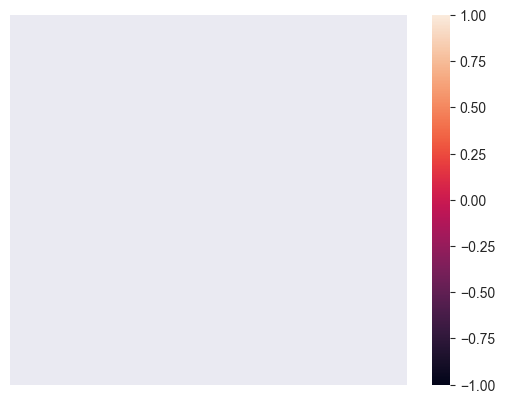

In [19]:
import seaborn as sns

sns.heatmap(new_df.corr(), vmin=-1, vmax=1, annot=False);

In [20]:
d = dict(new_df.corr()['APSP crude oil($/bbl)'])
l = []
for w in sorted(d, key=d.get, reverse=True):
    l.append((w, d[w]))

KeyError: 'APSP crude oil($/bbl)'

In [155]:
l[:10]

[('APSP crude oil($/bbl)', 1.0),
 ('Brent Crude ', 0.9990345398895324),
 ('Dubai Crude ', 0.9984395513122156),
 ('WTI Crude ', 0.9952315752844466),
 ('Gasoline ', 0.9856300907858276),
 ('Heating Oil ', 0.9842590161485381),
 ('Platinum', 0.9184618583512376),
 ('Copper ', 0.8954611915278519),
 ('Rapeseed Oil ', 0.8780900172859494),
 ('Soybeans ', 0.8479966677834656)]

Let's take a look at most correlated biy non-trivial ones:

In [152]:
TOP_20_CORRELATED = l[:20]
for i in TOP_20_CORRELATED:
    if 'rude' not in i[0]:
        print(i[0])

Gasoline 
Heating Oil 
Platinum
Copper 
Rapeseed Oil 
Soybeans 
Silver
Barley
Lead 
Corn 
Tin 
Soybeans Oil 
Rubber 
Fish Meal 
Soybean Meal 
Iron Ore


# Next step is using Lasso regression to determine key features that affect our target.

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [157]:
X, y = new_df.drop(columns=['APSP crude oil($/bbl)']), new_df['APSP crude oil($/bbl)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [159]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [160]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [161]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.016 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.015 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.017 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.015 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.014 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.047 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.048 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.050 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.042 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.039 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.098 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [162]:
search.best_params_

{'model__alpha': 0.1}

In [163]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [164]:
importance = np.abs(coefficients)

In [165]:
importance

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 12.71318569,  0.        ,  0.        ,  0.        ,
        0.        ,  9.25833927,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  9.65332662,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [176]:
np.array(new_df.drop(columns=['APSP crude oil($/bbl)']).columns)[importance > 0]

array(['Brent Crude ', 'Dubai Crude ', 'WTI Crude '], dtype=object)

# Using Prophet find Changing points in the US crude oil prices.

In [191]:
new_df['ds'] = new_df.index

In [ ]:
new_df.reset_index(inplace=False)

In [ ]:
new_df[['APSP crude oil($/bbl)']].rename(columns={'APSP crude oil($/bbl)':'y'})

In [198]:
new_df['y'] = new_df['APSP crude oil($/bbl)']

In [200]:
from fbprophet import Prophet

m = Prophet()
m.fit(new_df[['ds', 'y']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.01681
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        556.72     0.0034165       61.7039           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       557.274   0.000629313       83.1735   8.187e-06       0.001      305  LS failed, Hessian reset 
     199       557.298   7.00046e-05       57.7631           1           1      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263        557.31   3.62472e-05       71.8252   4.242e-07       0.001      439  LS failed, Hessian reset 
     278       557.311   1.43922e-07       50.2174    2.33e-09       0.001      500  LS failed, Hessian reset 
     299       557.311   2.89815e-08       47.9833     0.07846           1      530   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     65.4776       1.072      0.2965      540   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [201]:
future = m.make_future_dataframe(periods=1461)
future.tail()

,ds
1850,2026-09-27
1851,2026-09-28
1852,2026-09-29
1853,2026-09-30
1854,2026-10-01


In [202]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
1850,2026-09-27,58.646882,37.181838,80.038869
1851,2026-09-28,57.035188,35.289482,78.293435
1852,2026-09-29,55.568397,32.708155,77.009401
1853,2026-09-30,54.290349,34.069948,77.410046
1854,2026-10-01,53.239192,31.721117,74.233395


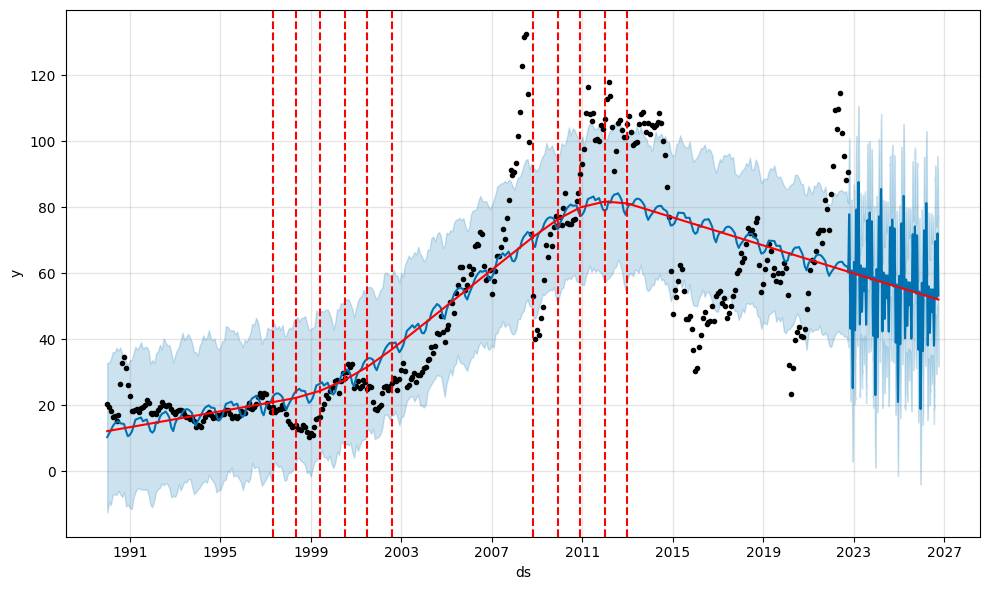

In [203]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [208]:
# m.changepoints

All change points presented:

13    1991-02-01\
25    1992-02-01\
38    1993-03-01\
50    1994-03-01\
63    1995-04-01\
75    1996-04-01\
88    1997-05-01\
100   1998-05-01\
113   1999-06-01\
126   2000-07-01\
138   2001-07-01\
151   2002-08-01\
163   2003-08-01\
176   2004-09-01\
188   2005-09-01\
201   2006-10-01\
214   2007-11-01\
226   2008-11-01\
239   2009-12-01\
251   2010-12-01\
264   2012-01-01\
276   2013-01-01\
289   2014-02-01\
301   2015-02-01\
314   2016-03-01\
Name: ds, dtype: datetime64[ns]